# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
print(f"{url}appid={weather_api_key}&units=metric&q=")

http://api.openweathermap.org/data/2.5/weather?appid=d09fb8f7906ea255879c752974dc65af&units=metric&q=


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  '&q=' + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url + 'appid=' + weather_api_key + city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nambucca heads
Processing Record 2 of Set 1 | nijar
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | avallon
Processing Record 6 of Set 1 | nome
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | mahebourg
Processing Record 11 of Set 1 | nefteyugansk
Processing Record 12 of Set 1 | saint george
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | sao gabriel da cachoeira
Processing Record 15 of Set 1 | ziniare
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | moissac
Processing Record 19 of Set 1 | ostrovnoy
Processing Record 20 of Set 1 | dingle
Processing Record 21 of Set 1 | broome
Processing Record 22 of Set 1 | new norfolk
Processing Record 23 of Set 1 

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          538
Lat           538
Lng           538
Max Temp      538
Humidity      538
Cloudiness    538
Wind Speed    538
Country       538
Date          538
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nambucca heads,-30.6500,153.0000,291.15,66,5,2.67,AU,1691277968
1,nijar,36.9665,-2.2060,297.40,47,0,1.54,ES,1691277968
2,jamestown,42.0970,-79.2353,295.92,74,0,3.09,US,1691277792
3,atuona,-9.8000,-139.0333,298.50,72,70,4.44,PF,1691277969
4,avallon,47.4833,3.9000,286.15,83,66,7.81,FR,1691277969


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nambucca heads,-30.6500,153.0000,291.15,66,5,2.67,AU,1691277968
1,nijar,36.9665,-2.2060,297.40,47,0,1.54,ES,1691277968
2,jamestown,42.0970,-79.2353,295.92,74,0,3.09,US,1691277792
3,atuona,-9.8000,-139.0333,298.50,72,70,4.44,PF,1691277969
4,avallon,47.4833,3.9000,286.15,83,66,7.81,FR,1691277969


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

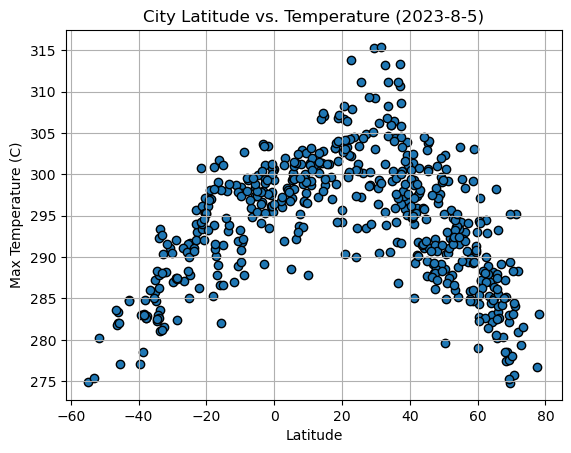

In [20]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df['Lat']
y_axis = city_data_df['Max Temp']
plt.scatter(x_axis, y_axis, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.grid(visible=True)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs. Temperature (2023-8-5)')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

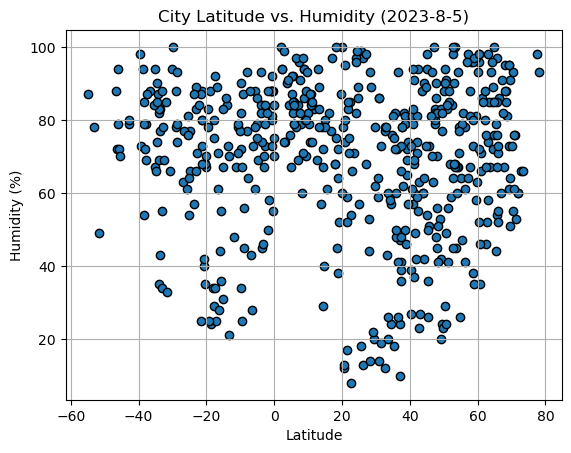

In [19]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']
plt.scatter(x_axis, y_axis, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.grid(visible=True)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (2023-8-5)')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

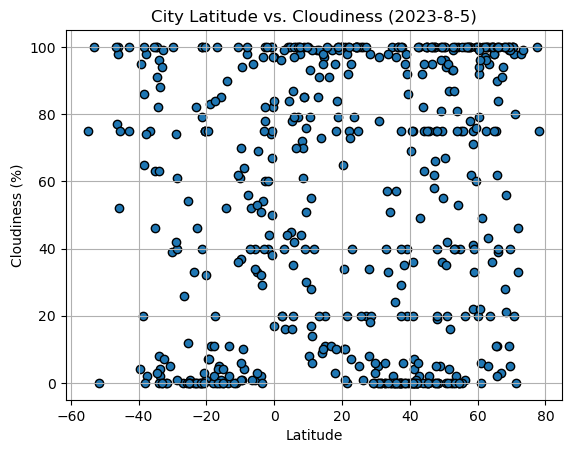

In [18]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df['Lat']
y_axis = city_data_df['Cloudiness']
plt.scatter(x_axis, y_axis, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.grid(visible=True)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (2023-8-5)')

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

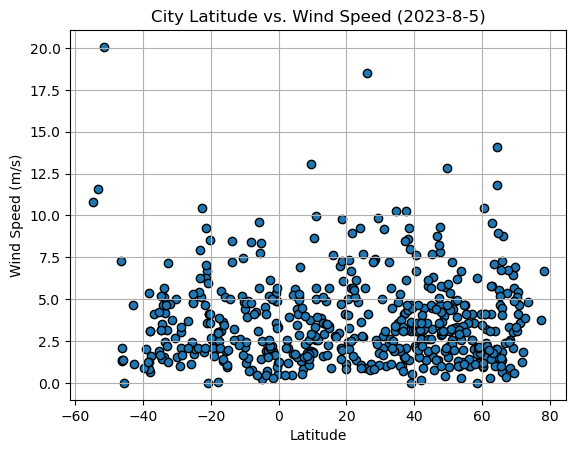

In [21]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df['Lat']
y_axis = city_data_df['Wind Speed']
plt.scatter(x_axis, y_axis, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.grid(visible=True)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (2023-8-5)')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [22]:
# Define a function to create Linear Regression plots
def linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()

In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,nijar,36.9665,-2.2060,297.40,47,0,1.54,ES,1691277968
2,jamestown,42.0970,-79.2353,295.92,74,0,3.09,US,1691277792
4,avallon,47.4833,3.9000,286.15,83,66,7.81,FR,1691277969
5,nome,64.5011,-165.4064,288.24,72,100,11.83,US,1691277970
10,nefteyugansk,61.0998,72.6035,287.10,66,6,3.24,RU,1691277972


In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nambucca heads,-30.6500,153.0000,291.15,66,5,2.67,AU,1691277968
3,atuona,-9.8000,-139.0333,298.50,72,70,4.44,PF,1691277969
6,ahipara,-35.1667,173.1667,285.83,67,46,1.88,NZ,1691277971
7,hobart,-42.8794,147.3294,284.85,79,75,4.63,AU,1691277971
8,mataura,-46.1927,168.8643,283.42,79,100,1.39,NZ,1691277971


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.4292718872170149


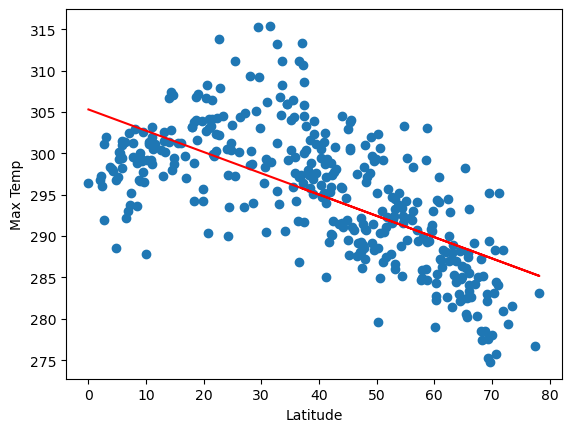

In [37]:
# Linear regression on Northern Hemisphere
t_north_x = northern_hemi_df['Lat']
t_north_y = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(t_north_x, t_north_y)
regress_val = t_north_x * slope + intercept
lin_reg_eq = "Y = " + str(round(slope,2)) + "X + " + str(round(intercept,2))

plt.scatter(t_north_x, t_north_y)
plt.plot(t_north_x,regress_val,"r-")
plt.annotate(lin_reg_eq,(5,-20),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')


print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.6707532809676244


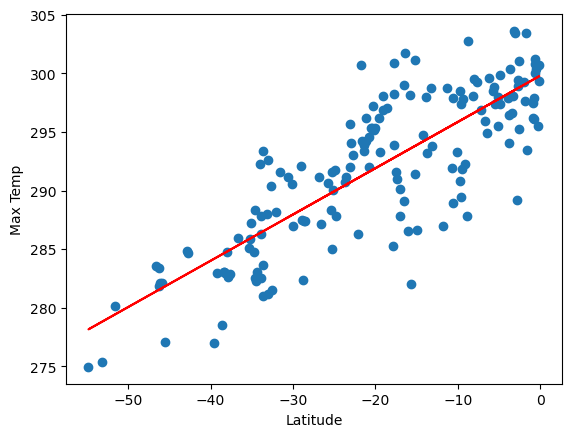

In [36]:
# Linear regression on Southern Hemisphere
t_south_x = southern_hemi_df['Lat']
t_south_y = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(t_south_x, t_south_y)
s_regress_val = t_south_x * slope + intercept
s_lin_reg_eq = "Y = " + str(round(slope,2)) + "X + " + str(round(intercept,2))

plt.scatter(t_south_x, t_south_y)
plt.plot(t_south_x,s_regress_val,"r-")
plt.annotate(s_lin_reg_eq,(-55,27),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')


print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** This data does seem to have a linear relationship and in each case has a close relation to the best fit line

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.002008255887436041


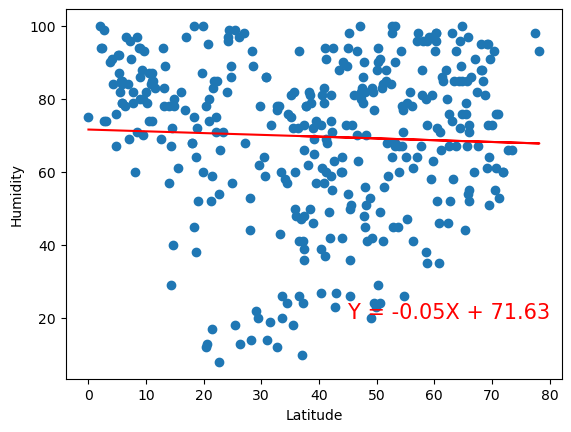

In [29]:
# Northern Hemisphere
h_north_x = northern_hemi_df['Lat']
h_north_y = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(h_north_x, h_north_y)
nh_regress_val = h_north_x * slope + intercept
nh_lin_reg_eq = "Y = " + str(round(slope,2)) + "X + " + str(round(intercept,2))

plt.scatter(h_north_x, h_north_y)
plt.plot(h_north_x,nh_regress_val,"r-")
plt.annotate(nh_lin_reg_eq,(45,20),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Humidity')


print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.008586063295912804


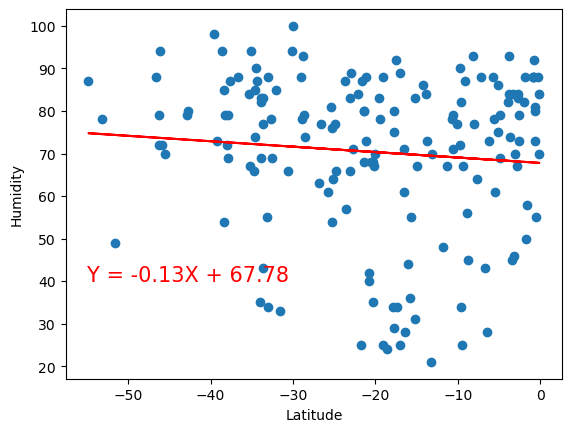

In [30]:
# Southern Hemisphere
h_south_x = southern_hemi_df['Lat']
h_south_y = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(h_south_x, h_south_y)
sh_regress_val = h_south_x * slope + intercept
sh_lin_reg_eq = "Y = " + str(round(slope,2)) + "X + " + str(round(intercept,2))

plt.scatter(h_south_x, h_south_y)
plt.plot(h_south_x,sh_regress_val,"r-")
plt.annotate(sh_lin_reg_eq,(-55,40),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Humidity')


print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** This does not seem to have any close linear relationship, seems that the data has no relationship with each other

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0009709031830329567


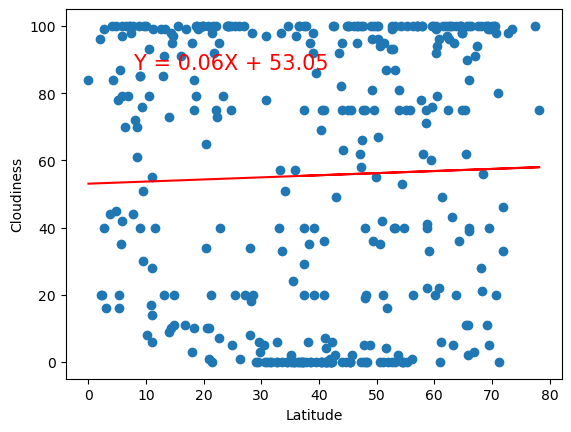

In [31]:
# Northern Hemisphere
c_north_x = northern_hemi_df['Lat']
c_north_y = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(c_north_x, c_north_y)
cn_regress_val = c_north_x * slope + intercept
cn_lin_reg_eq = "Y = " + str(round(slope,2)) + "X + " + str(round(intercept,2))

plt.scatter(c_north_x, c_north_y)
plt.plot(c_north_x,cn_regress_val,"r-")
plt.annotate(cn_lin_reg_eq,(8,87),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')


print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.0027677175973069646


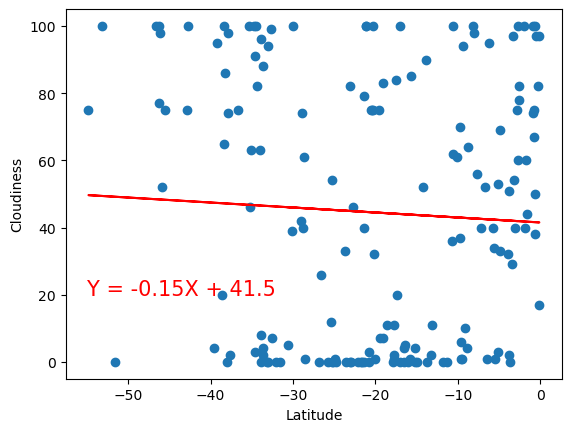

In [32]:
# Southern Hemisphere
c_south_x = southern_hemi_df['Lat']
c_south_y = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(c_south_x, c_south_y)
sc_regress_val = c_south_x * slope + intercept
sc_lin_reg_eq = "Y = " + str(round(slope,2)) + "X + " + str(round(intercept,2))

plt.scatter(c_south_x, c_south_y)
plt.plot(c_south_x,sc_regress_val,"r-")
plt.annotate(sc_lin_reg_eq,(-55,20),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')


print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** R-value on both of these are very low and has no linear relationship

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 5.260091262892381e-05


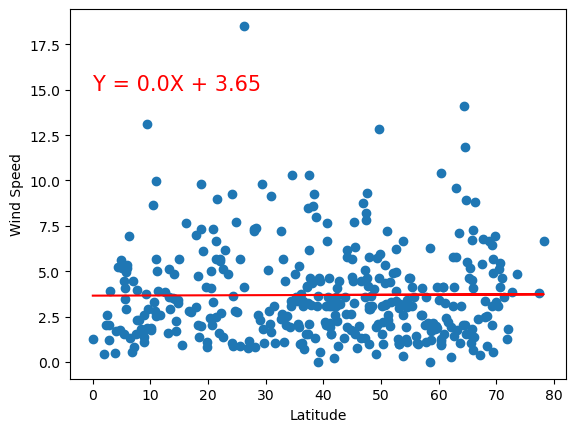

In [33]:
# Northern Hemisphere
w_northern_x = northern_hemi_df['Lat']
w_northern_y = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(w_northern_x, w_northern_y)
nw_regress_val = w_northern_x * slope + intercept
nw_lin_reg_eq = "Y = " + str(round(slope,2)) + "X + " + str(round(intercept,2))

plt.scatter(w_northern_x, w_northern_y)
plt.plot(w_northern_x,nw_regress_val,"r-")
plt.annotate(nw_lin_reg_eq,(0,15),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')


print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.014040692296158367


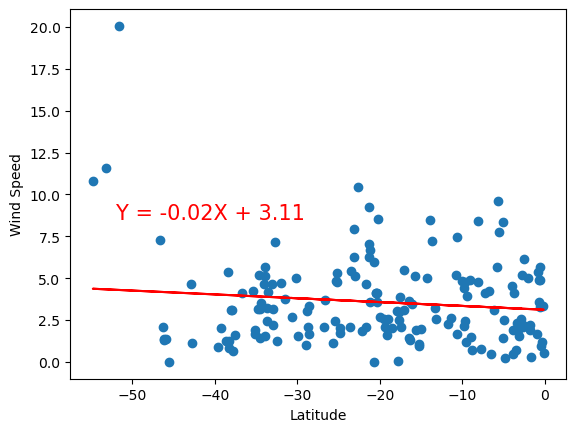

In [34]:
# Southern Hemisphere
w_southern_x = southern_hemi_df['Lat']
w_southern_y = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(w_southern_x, w_southern_y)
sw_regress_val = w_southern_x * slope + intercept
sw_lin_reg_eq = "Y = " + str(round(slope,2)) + "X + " + str(round(intercept,2))

plt.scatter(w_southern_x, w_southern_y)
plt.plot(w_southern_x,sw_regress_val,"r-")
plt.annotate(sw_lin_reg_eq,(-52,8.5),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')


print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** Nost of the data is focused in one area but the linear relationship does represent a good amount of the data